In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

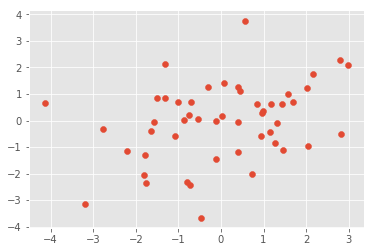

In [2]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3,1],[1,2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:,0], data[:,1])
plt.show()

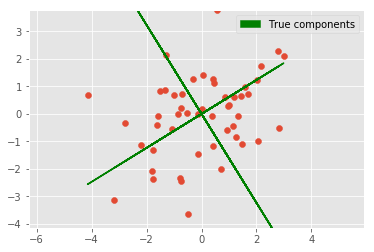

In [3]:
v, W_true = np.linalg.eig(C)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

In [6]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], -(W_pca[0,0]/W_pca[0,1])*data[:,0], color="c")
    plt.plot(data[:,0], -(W_pca[1,0]/W_pca[1,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # сделаем графики красивыми:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()

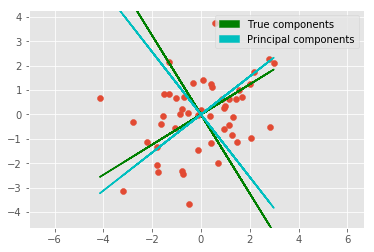

In [7]:
model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

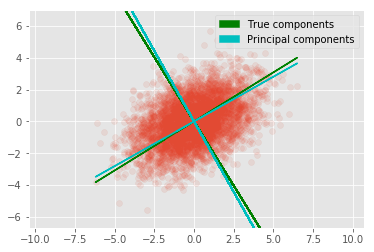

In [8]:
data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:,0], data_large[:,1], alpha=0.1)
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data_large[:,0], (W_true[0,0]/W_true[0,1])*data_large[:,0], color="g")
plt.plot(data_large[:,0], (W_true[1,0]/W_true[1,1])*data_large[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

In [9]:
from sklearn.decomposition import PCA
from sklearn.cross_validation import cross_val_score as cv_score

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    
def write_answer_1(optimal_d):
    with open("pca_answer1.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task1.csv')



/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


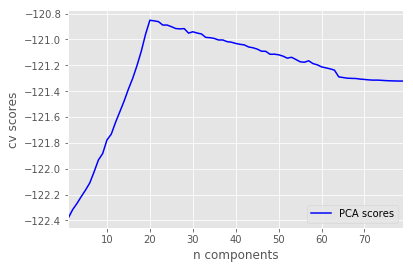

20
-122.38344625107658


In [40]:
d_scores1 = np.array([])
optimal_comp = 0
max_score = -1000000
for i in range (1, len(data.columns), 1):
    model = PCA (n_components =i)
    model.fit (data)
    scores = cv_score(model, data)
    if scores.mean() > max_score:
        optimal_comp = i
        max_score = scores.mean()
    d_scores1 = np.append (d_scores1, scores.mean())
plot_scores(d_scores1)
print optimal_comp
print max_score

In [41]:
write_answer_1(optimal_comp)

In [42]:
from sklearn.decomposition import PCA
from sklearn.cross_validation import cross_val_score as cv_score

def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()
    
def write_answer_2(optimal_d):
    with open("pca_answer2.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task2.csv')


In [46]:
print len(data.columns)
model = PCA (n_components = len(data.columns))
model.fit (data)

100


PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

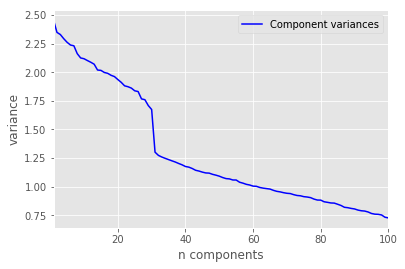

In [48]:
model.transform(data)
plot_variances (model.explained_variance_)


In [55]:
import math
max_raznost = 0
n_of_components = 0
for i in range (1, len(model.explained_variance_),1):
    if math.fabs(model.explained_variance_[i-1] - model.explained_variance_[i]) > max_raznost:
        max_raznost = math.fabs(model.explained_variance_[i-1] - model.explained_variance_[i]) 
        n_of_components = i

In [60]:
model = PCA (n_components =n_of_components)
model.fit (data)
scores = cv_score(model, data)
print scores.mean()
write_answer_2(n_of_components)

-153.14323476967874


In [206]:
from sklearn import datasets

def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(transformed_data[target == i, 0],
                    transformed_data[target == i, 1], c=c, label=target_name)
    plt.legend()
    plt.show()
    
def write_answer_3(list_pc1, list_pc2):
    with open("pca_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc1]))
        fout.write(" ")
        fout.write(" ".join([str(num) for num in list_pc2]))

# загрузим датасет iris
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names


In [207]:
model = PCA(n_components = 2)
model.fit (data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [208]:
data_trans = model.transform(data)

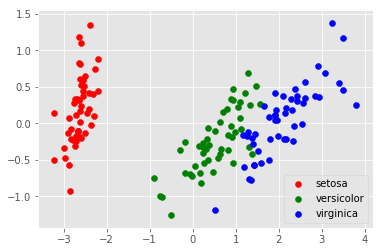

In [209]:
plot_iris(data_trans, target, target_names)

In [210]:
data_trans[:,1].mean()

-8.289665250534502e-16

In [211]:
r = 0
r_upper = 0
r_down_x = 0
r_down_y = 0
cor = np.array([0,0,0])
for k in range (0,len (data_trans[0]),1):
    for x in range (0,len (data[0]),1):
        for i in range (0,len (data), 1):
            r_upper += (data[i,x] - data[:,x].mean()) * (data_trans[i,k] - data_trans[:,k].mean())
            r_down_x += (data[i,x] - data[:,x].mean())**2
            r_down_y += (data_trans[i,k] - data_trans[:,k].mean())**2
        print r_upper / (r_down_x * r_down_y)**0.5
        print k
        print x


0.8975448849407613
0
0
0.4343230478956953
0
1
0.6750959632473462
0
2
0.7186467859317207
0
3
0.6821277803071901
1
0
0.6837298111288826
1
1
0.538107745780824
1
2
0.5157205908402358
1
3


In [212]:
strong_with_1 = np.array ([1,3,4])
strong_with_2 = np.array ([2])

In [213]:
write_answer_3(strong_with_1,strong_with_2)

In [275]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import RandomizedPCA

def write_answer_4(list_pc):
    with open("pca_answer4.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc]))

data1 = fetch_olivetti_faces(shuffle=True, random_state=0).data
image_shape = (64, 64)

In [276]:
model = RandomizedPCA (n_components = 10)
model.fit (data1)

/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedPCA(copy=True, iterated_power=2, n_components=10, random_state=None,
       whiten=False)

In [277]:
data_transform1 = model.transform (data1)

-1.9073487e-07

In [279]:
max_d = np.array ([], dtype ='int')
    
for k in range (0,len(data_transform1[0]),1):
    max_d_promeg = 0
    l =0
    for i in data_transform1:
        max_d2 = (i[k]**2)/(sum(i**2))   
        if max_d2 > max_d_promeg:
                max_d_promeg = max_d2
                max_i = l
        l+=1
    z = np.array ([max_i])
    print z
    max_d = np.append (max_d,z)

[197]
[18]
[66]
[319]
[363]
[131]
[142]
[382]
[353]
[140]


In [280]:
max_d

array([197,  18,  66, 319, 363, 131, 142, 382, 353, 140])

In [281]:
write_answer_4(max_d)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


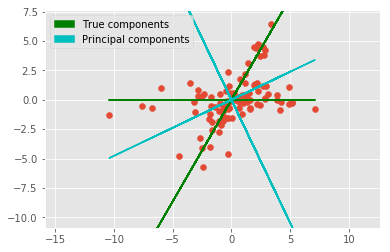

In [157]:
C1 = np.array([[10,0],[0,0.5]])
phi = np.pi/3
C2 = np.dot(C1, np.array([[np.cos(phi), np.sin(phi)],
                          [-np.sin(phi),np.cos(phi)]]))

data = np.vstack([np.random.multivariate_normal(mu, C1, size=50),
                  np.random.multivariate_normal(mu, C2, size=50)])
plt.scatter(data[:,0], data[:,1])
# построим истинные интересующие нас компоненты
plt.plot(data[:,0], np.zeros(data[:,0].size), color="g")
plt.plot(data[:,0], 3**0.5*data[:,0], color="g")
# обучим модель pca и построим главные компоненты
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

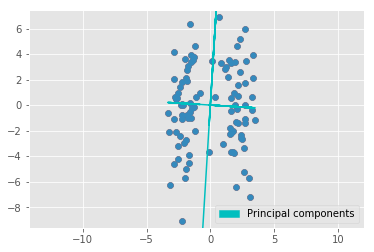

In [158]:
C = np.array([[0.5,0],[0,10]])
mu1 = np.array([-2,0])
mu2 = np.array([2,0])

data = np.vstack([np.random.multivariate_normal(mu1, C, size=50),
                  np.random.multivariate_normal(mu2, C, size=50)])
plt.scatter(data[:,0], data[:,1])
# обучим модель pca и построим главные компоненты
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model)
plt.draw()